Logistic Regression
=========

In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("ggplot")

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_fscore_support, auc, accuracy_score

In [2]:
data = pd.read_csv("../data/loans_sample_processed.csv", sep = "^")

In [3]:
data.head()

,funded_amnt_inv,installment,int_rate,annual_inc,dti,total_rec_late_fee,total_acc,manager,refinance,term_ 36 months,...,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App,non_payment
0,25000.0,777.55,7.49,106157.0,9.37,0.00,49.0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
1,12000.0,404.27,12.99,67000.0,21.33,0.00,28.0,1,1,1,...,0,0,1,0,0,0,0,1,0,1
2,4800.0,175.59,18.85,56000.0,7.62,0.00,15.0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
3,7900.0,273.82,14.99,58300.0,12.15,0.00,17.0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
4,10725.0,385.43,17.57,36000.0,21.68,19.27,18.0,0,1,1,...,0,0,0,0,0,0,1,1,0,0


In [4]:
data.shape

(99092, 38)

__Scale__:

In [5]:
numeric_variables = ['funded_amnt_inv', 'installment', 'int_rate', 'annual_inc', 'dti',
                     'total_rec_late_fee', 'total_acc']

In [6]:
scaler = RobustScaler()

In [7]:
scaler.fit(data[numeric_variables])

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [8]:
data[numeric_variables] = scaler.transform(data[numeric_variables])

In [9]:
data.head()

,funded_amnt_inv,installment,int_rate,annual_inc,dti,total_rec_late_fee,total_acc,manager,refinance,term_ 36 months,...,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App,non_payment
0,1.072165,1.286718,-0.873016,0.929667,-0.666944,0.00,1.666667,0,1,1,...,0,0,1,0,0,0,0,1,0,0
1,0.000000,0.100308,0.000000,0.059511,0.328893,0.00,0.266667,1,1,1,...,0,0,1,0,0,0,0,1,0,1
2,-0.593814,-0.626514,0.930159,-0.184933,-0.812656,0.00,-0.600000,0,1,1,...,0,0,0,0,0,0,1,1,0,0
3,-0.338144,-0.314306,0.317460,-0.133822,-0.435470,0.00,-0.466667,0,1,1,...,0,0,1,0,0,0,0,1,0,0
4,-0.105155,0.040428,0.726984,-0.629378,0.358035,19.27,-0.400000,0,1,1,...,0,0,0,0,0,0,1,1,0,0


__Train / Test split:__

In [10]:
X = data.loc[:, data.columns!='non_payment']

In [11]:
y = data['non_payment']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4290)

__Prior__:

In [13]:
y.value_counts()[0] / len(y)

0.7940196988657006

__Logistic Regression__:

In [14]:
log_reg = LogisticRegression(penalty='l2',C=0.5)

In [15]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
log_reg.predict_proba(X_test)

array([[0.80562666, 0.19437334],
       [0.92150518, 0.07849482],
       [0.70345307, 0.29654693],
       ...,
       [0.63799709, 0.36200291],
       [0.89417148, 0.10582852],
       [0.94446387, 0.05553613]])

__Model Evaluation__

AUC in the train set:

In [17]:
y_scores_train = log_reg.predict_proba(X_train)

y_scores_train = pd.DataFrame(y_scores_train).loc[:,1]

In [18]:
roc_auc_score(y_train, y_scores_train)

0.7199195497132328

ROC Curve:

In [19]:
y_scores = log_reg.predict_proba(X_test)

y_scores = pd.DataFrame(y_scores).loc[:,1]

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_scores)

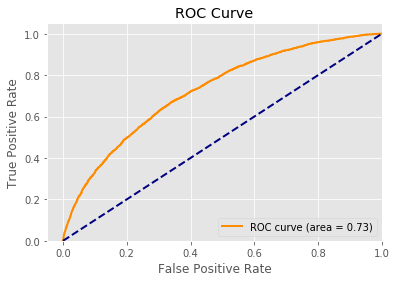

In [21]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

AUC:

In [22]:
roc_auc_score(y_test, y_scores)

0.7254806143371405

Confusion Matrix

In [23]:
y_predictions = log_reg.predict(X_test)

In [24]:
confusion_matrix(y_test, y_predictions)

array([[15485,   235],
       [ 3751,   348]])

Accuracy:

In [25]:
accuracy_score(y_test, y_predictions)

0.7988798627579595

Recall:

In [26]:
precision_recall_fscore_support(y_test, y_predictions) [0]

array([0.80500104, 0.59691252])

Precision:

In [27]:
precision_recall_fscore_support(y_test, y_predictions) [1]

array([0.98505089, 0.08489876])